Link para o vídeo: https://drive.google.com/file/d/1TOcJZUIF41a0VmDI5YiMu5Yx0flJFeD-/view?usp=drive_link



In [ ]:
## Obtendo os dados
import pandas as pd
faithful = pd.read_csv("faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [ ]:
# Função que computa o erro do oráculo
def erro_quadratico_acumulado(oraculo) :
    # Obtendo as observações de erupção e espera
    # do old faithful geyzer
    pontos_y = faithful.eruptions.values
    pontos_x = faithful.waiting.values

    # Vamos concatenar os quadrados das distâncias
    # entre a espera real e a predita
    erro = 0
    for i in range(len(pontos_x)) :
        # Usando o oráculo para obter a predição.
        # Posteriormente, chamaremos isso de
        # passo forward.
        predicted = oraculo(pontos_x[i])

        # O erro é o quadrado da diferença entre
        # o que foi predito e o que estava no
        # banco de dados
        erro += (predicted - pontos_y[i])**2

    return erro

In [ ]:
# Função que cria um gráfico do oráculo
import matplotlib.pyplot as plt
def plota_grafico(oraculo, with_error = False) :
    ## Plotando os pontos do banco de dados
    faithful.plot.scatter(x='waiting',
                          y='eruptions')

    ## Criando um eixo X para plotar a reta
    eixo_x = range(40,100,2)
    eixo_y = []

    ## Gerando a resposta do oráculo
    for x in eixo_x :
        eixo_y.append(oraculo(x))

    ## Plotando a reta
    plt.plot(eixo_x, eixo_y, 'r--', label='Valores Obtidos')

    if (with_error) :

        ## Colocando barras verticais para evidenciar erros
        ## do oráculo
        pontos_y = faithful.eruptions.values
        pontos_x = faithful.waiting.values
        for i in range(len(pontos_x)) :
            predicted = oraculo(pontos_x[i])
            plt.plot(
                (pontos_x[i], pontos_x[i]),
                (predicted, pontos_y[i]),
                '-', c = "black"
            )

In [ ]:
def erro_quadratico_variando_a_b_c() :
    # Listas a serem retornadas.
    eixo_a = []
    eixo_b = []
    eixo_c = []
    eixo_erro = []

    # ToDo: Configure os mínimos e máximos de
    # a, b e c na sua busca
    min_a = 0.0005
    max_a = 1

    min_b = 0.0001
    max_b = 1

    min_c = 0.5
    max_c = 1

    ## ToDo: Configure o número de iterações. Note
    ## que valores altos levará a um tempo de espera
    ## muito longo, dado que faremos três laços aninhados.
    iter_a = 20
    iter_b = 20
    iter_c = 20

    for i in range(iter_a) :
        a = min_a + i * (max_a - min_a)/iter_a

        for j in range(iter_b) :
            b = min_b + j * (max_b - min_b)/iter_b

            for k in range(iter_c) :
                c = min_c + k * (max_c - min_c)/iter_c

                eixo_a.append(a)
                eixo_b.append(b)
                eixo_c.append(c)

                ## ToDo: crie o oráculo com os valores de a, b e c.
                oraculo = lambda x : a*x*x + b*x + c

                eixo_erro.append(erro_quadratico_acumulado(oraculo))

    return eixo_a, eixo_b, eixo_c, eixo_erro

eixo_a, eixo_b, eixo_c, eixo_erro = erro_quadratico_variando_a_b_c()
print(eixo_a)
print(eixo_b)
print(eixo_c)
print(eixo_erro)

[0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005,

In [ ]:
erro_minimo = 1000000 ## Um valor alto
a_minimo = None
b_minimo = None
c_minimo = None

for i in range(len(eixo_erro)) :
    if eixo_erro[i] < erro_minimo :
        a_minimo = eixo_a[i]
        b_minimo = eixo_b[i]
        c_minimo = eixo_c[i]

        erro_minimo = eixo_erro[i]

print(a_minimo, b_minimo, c_minimo, erro_minimo)

0.0005 0.0001 0.875 74.39610376000006


In [ ]:
def quarto_oraculo(x) :
    return 0.08*x -2.2

plota_grafico(quarto_oraculo)
plota_grafico(quarto_oraculo, with_error = True)

74.85716349999998


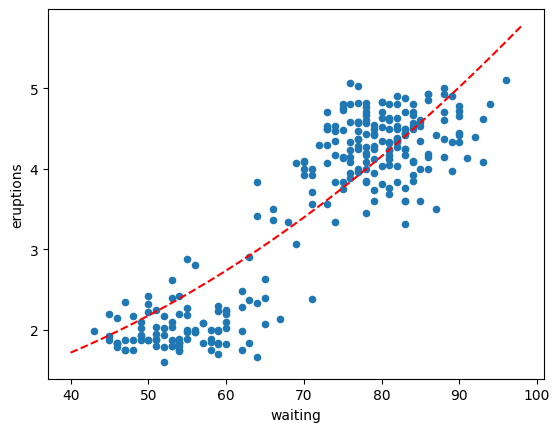

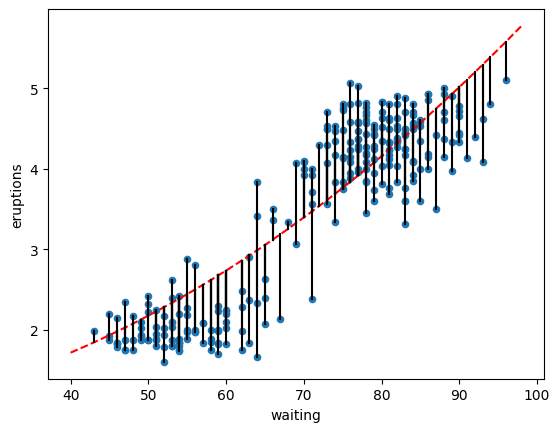

In [ ]:
def quinto_oraculo(x):
    return 0.0005*x*x + 0.001*x + 0.875

plota_grafico(quinto_oraculo)
plota_grafico(quinto_oraculo, with_error = True)
print(erro_quadratico_acumulado(quinto_oraculo))

<Axes: xlabel='waiting', ylabel='eruptions'>

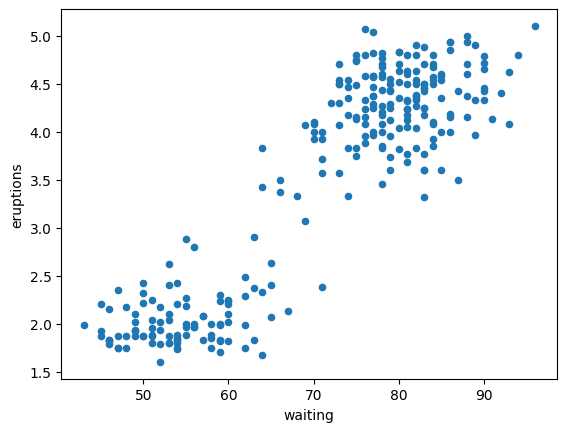

In [ ]:
faithful.plot.scatter(x='waiting', y='eruptions')

160198.9039390001


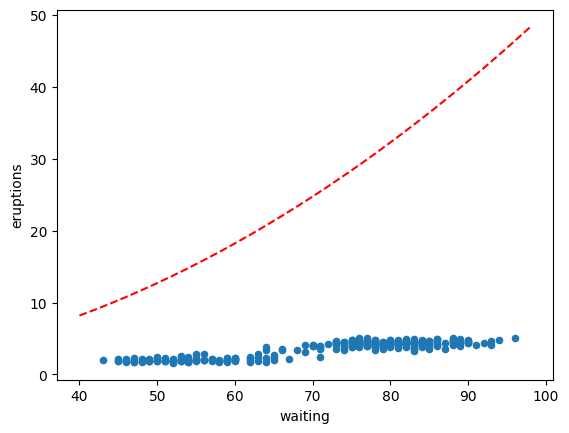

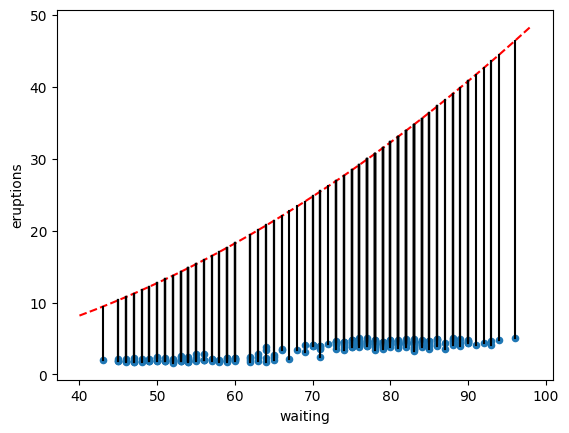

In [ ]:
def quinto_oraculo(x):
    return 0.005*x*x + 0.002*x + 0.1

plota_grafico(quinto_oraculo)
plota_grafico(quinto_oraculo, with_error = True)
print(erro_quadratico_acumulado(quinto_oraculo))